In [28]:
import torch
from torch import atan
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.misc import derivative
import scipy.linalg as la

from sympy import *
import sympy as sp
from scipy.special import roots_legendre
from Func import *


In [29]:
x = symbols('x')
fx = x * (1 - x) * sp.exp(x)
dfdx = diff(fx, x)

df2d2x = diff(diff(fx, x), x)
ceiling(df2d2x)


ceiling(x*(1 - x)*exp(x) - 2*x*exp(x) + 2*(1 - x)*exp(x) - 2*exp(x))

In [30]:
# 有限元分析的数学建模page 21
# def error(u, un):
#   x = symbols('x')
#   du = diff(u, x)
#   B = G_integrate(du**2+u**2, x)
#   A = (1/2*B)**0.5
#   dun = diff(un, x)
#   Bn = G_integrate(dun**2+(un)**2, x)
#   Aup = (0.5*B-0.5*Bn)**0.5

#   return float((Aup.evalf()/A.evalf()))
# def cal_U(u):
#   x = symbols('x')
#   du = diff(u, x)
#   B = integrate(du**2+u**2, (x, 0, 1))
#   B = G_integrate(du**2+u**2, x)
#   U = (1/2*B)**0.5
#   return U.evalf()
  

def u(x):
    return -2*E/(E**2-1)*sinh(x)+x

def uh(x):
  return 0.14588*x*(1-x) + 0.16279*x**2*(1-x)

#print(error(u(x), uh(x)))
print(cal_U(u(x)-uh(x))/cal_U(u(x)))
print(error(u(x), uh(x)))

0.00199141226604224
0.00199141226604224


In [31]:
def l2_error_quadratic(n, x, u, exact):

  # *****************************************************************************80
  #
  # l2_error_quadratic() estimates the L2 error norm of a finite element solution.
  #
  #  Discussion:
  #
  #    We assume the finite element method has been used, over an interval [A,B]
  #    involving N nodes, with piecewise quadratic elements used for the basis.
  #    The coefficients U(1:N) have been computed, and a formula for the
  #    exact solution is known.
  #
  #    This function estimates the L2 norm of the error:
  #
  #      L2_NORM = Integral ( A <= X <= B ) ( U(X) - EXACT(X) )^2 dX
  #
  #  Licensing:
  #
  #    This code is distributed under the GNU LGPL license.
  #
  #  Modified:
  #
  #    12 July 2015
  #
  #  Author:
  #
  #    John Burkardt
  #
  #  Input:
  #
  #    integer N, the number of nodes.
  #
  #    real X(N), the mesh points.
  #
  #    real U(N), the finite element coefficients.
  #
  #    function EQ = EXACT ( X ), returns the value of the exact
  #    solution at the point X.
  #
  #  Output:
  #
  #    real E2, the estimated L2 norm of the error.
  #

    e2 = 0.0
  #
  #  Define a 2 point Gauss-Legendre quadrature rule on [-1,+1].
  #
    quad_num = 2
    abscissa = np.array([-0.577350269189625764509148780502,
                         +0.577350269189625764509148780502])
    weight = np.array([1.0, 1.0])
  #
  #  Integrate over each interval.
  #
    e_num = (n - 1) // 2

    for e in range(0, e_num):

        l = 2 * e
        xl = x[l]
        ul = u[l]

        m = 2 * e + 1
        xm = x[m]
        um = u[m]

        r = 2 * e + 2
        xr = x[r]
        ur = u[r]

        for q in range(0, quad_num):

            xq = ((1.0 - abscissa[q]) * xl
                  + (1.0 + abscissa[q]) * xr) \
                / 2.0

            wq = weight[q] * (xr - xl) / 2.0

            vl = ((xq - xm) / (xl - xm)) \
                * ((xq - xr) / (xl - xr))

            vm = ((xq - xl) / (xm - xl)) \
                * ((xq - xr) / (xm - xr))

            vr = ((xq - xl) / (xr - xl)) \
                * ((xq - xm) / (xr - xm))

            uq = u[l] * vl + u[m] * vm + u[r] * vr

            eq = exact(xq)

            e2 = e2 + wq * (uq - eq) ** 2

    e2 = np.sqrt(e2)

    return e2


x_n = 3

x_lo = 0.0
x_hi = np.pi
x = np.linspace(x_lo, x_hi, x_n)

# U is an approximation to sin(x).

u = np.zeros(x_n)
for i in range(0, x_n):
    u[i] = np.sin(x[i])

e1 = l2_error_quadratic(x_n, x, u, np.sin)

print('  %2d  %g' % (x_n, e1))


   3  0.0894667


(1 - x)*(atan(0.5*x - 0.4) + 0.380506377112365)
(1 - x)*(atan(50*x - 40.0) + 1.54580153317598)
0.5*(1 - x)/(0.25*(x - 0.8)**2 + 1) - atan(0.5*x - 0.4) - 0.380506377112365
0.43103448275862055
50*(1 - x)/(2500*(x - 0.8)**2 + 1) - atan(50*x - 40.0) - 1.54580153317598
0.03123048094940306


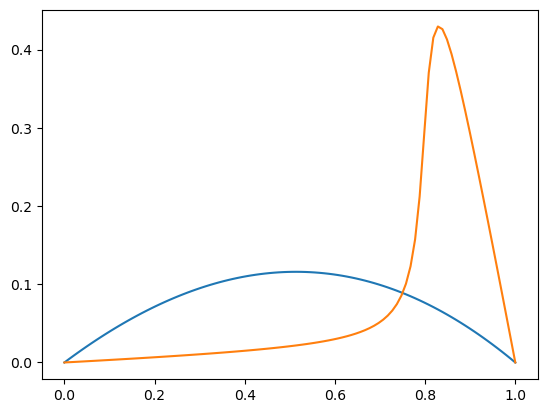

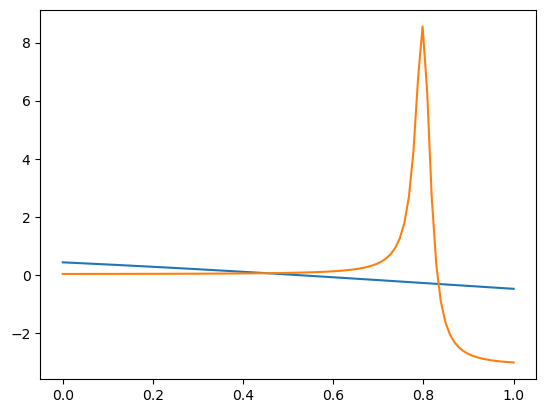

In [32]:
def f(x, a, xb=0.8):
    return (1 - x) * (sp.atan(a * (x - xb)) + sp.atan(a*xb))
def d2f(x, a, xb=0.8):
    b = x-xb
    return -2*(a+a**3*b*(b-x+1))/(a**2*b**2+1)**2

x = symbols('x')
x_data = np.linspace(0, 1, 100)
a = [0.5, 50]
xb = 0.8

for i in a:
    f_ = f(x, i)
    f_func = lambdify(x, f_)
    print(f_)
    #plt.figure()
    plt.plot(x_data, f_func(x_data))

plt.figure()
for i in a:
    df_ = diff(f(x, i), x)
    df_func = lambdify(x, df_)
    print(df_)

    plt.plot(x_data, df_func(x_data))
    print(df_func(0))



In [33]:
N = 3  # 取3个样本点
a = 0  # 积分上下限
b = 1
x, w = roots_legendre(N)
print(x, w)
print(5/9)

[-0.77459667  0.          0.77459667] [0.55555556 0.88888889 0.55555556]
0.5555555555555556


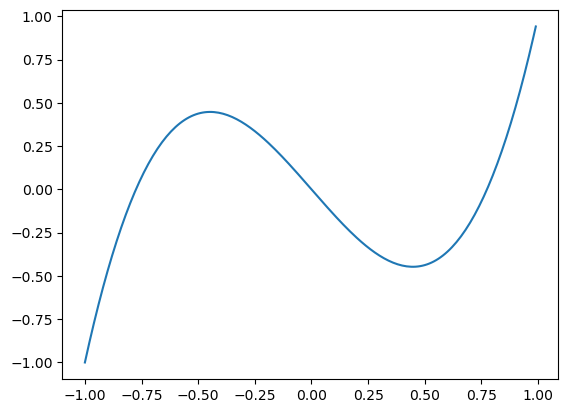

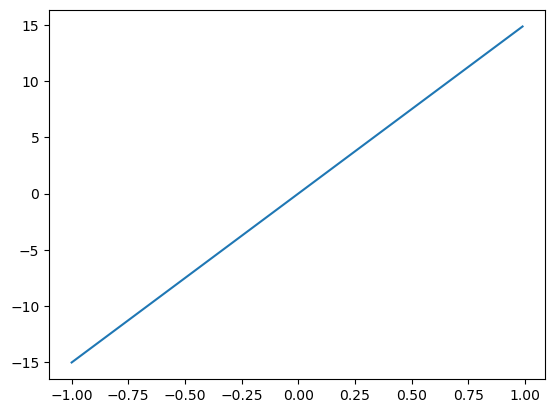

In [34]:
from sympy import *
import matplotlib.pyplot as plt

x=symbols("x")
#legendre的n阶多项式
def legendre_polynomial(n):
    '''
    :param n: legendre多项式项数
    :return: legendre的n项展开
    '''

    P = [1, x]
    for i in range(1,n):
        m=(2*i+1)/(i+1)*x*P[i]-i/(i+1)*P[i-1]
        P.append(m)
    return P[n]
P_n=legendre_polynomial(3)
x1=[]
y1=[]
for i in range(200):
    x1.append(-1+0.01*i)
for i in x1:
    y1.append(P_n.subs('x',i))

plt.plot(x1,y1)
plt.show()
#legendre的n阶多项式的m次导数
def Derivation(function,m):   #多阶求导
    """
    :param function : 待求导数的函数
    :param m: 求导阶数
    :return: legendre的n阶多项式的m次导数
    """
    for i in range(m):  #逐次求导  ，共m次
        f = diff(function, x, m)
    return f

der=Derivation(P_n,2)

y_value=[]
for i in x1:
    y_value.append(der.subs('x',i))

plt.plot(x1,y_value)
plt.show()

In [54]:
x = symbols('x')
u = symbols('u')
a = 0.5
xb = 0.8
b = x-xb


def f(x, a=0.5, xb=0.8):
    return (1 - x) * (sp.atan(a * (x - xb)) + sp.atan(a*xb))


def d2f(x, a=0.5, xb=0.8):
    b = x-xb

    return -2*(a+a**3*b*(b-x+1))/(a**2*b**2+1)**2

def testfunc(x, a=0.5, xb=0.8):
  return (0.25*(x - 0.8)**2 + 1)

print(simplify(diff(diff(f(x), x), x)))
print(expand(d2f(x)))
print(simplify(testfunc(x)))

(-0.05*x - 0.96)/(0.0625*x**4 - 0.2*x**3 + 0.74*x**2 - 0.928*x + 1.3456)
-0.0371581450653983*x/(0.0464476813317479*x**4 - 0.148632580261593*x**3 + 0.549940546967895*x**2 - 0.689655172413793*x + 1) - 0.713436385255648/(0.0464476813317479*x**4 - 0.148632580261593*x**3 + 0.549940546967895*x**2 - 0.689655172413793*x + 1)
0.25*(x - 0.8)**2 + 1


In [52]:
expand(d2f(x))

-0.0371581450653983*x/(0.0464476813317479*x**4 - 0.148632580261593*x**3 + 0.549940546967895*x**2 - 0.689655172413793*x + 1) - 0.713436385255648/(0.0464476813317479*x**4 - 0.148632580261593*x**3 + 0.549940546967895*x**2 - 0.689655172413793*x + 1)

In [36]:
import numpy as np
npo=4;xi=4.5
x=np.array([1,3,6,5])
y=np.array([1,5,10,9])
print('使用拉格朗日多项式得插值法')
print('数据点','  x    y')
for i in range(1,npo+1):
    print('{:13.4e}'.format(x[i-1]),end='')
    print('{:13.4e}'.format(x[i-1]))
yi=0
for i in range(1,npo+1):
    term=1.0
    for j in range(1,npo+1):
        if j!=i:
            term=term*(xi-x[j-1])/(x[i-1]-x[j-1])
    yi=yi+term*y[i-1]
print('插值点','   x   y')
print('{:13.4e}'.format(xi),end='')
print('{:13.4e}'.format(yi))


使用拉格朗日多项式得插值法
数据点   x    y
   1.0000e+00   1.0000e+00
   3.0000e+00   3.0000e+00
   6.0000e+00   6.0000e+00
   5.0000e+00   5.0000e+00
插值点    x   y
   4.5000e+00   8.1750e+00


In [73]:

x = symbols("x")
def Legendre(x=np.linspace(-1, 1, 100), p=5 ):

    if p == 0:
        return 1
    elif p == 1:
        return x
    
    else:
      return ((2*p-1)*x*Legendre(x, p-1)+(1-p)*Legendre(x, p-2))/p

def Hierarchical(x=np.linspace(0, 1, 3), p=5):
    phi = []
    dphi = []
    phi.append((1-x)/2)
    phi.append((1+x)/2)
    dphi.append(np.zeros_like(x)-1/2)
    dphi.append(np.zeros_like(x)+1/2)
    
    for j in range(2, p+1):
        phi.append(1/np.sqrt(4*j-2)*(Legendre(x, j)-Legendre(x, j-2)))
        dphi.append(np.sqrt(j-1/2)*(Legendre(x, j-1)))
        
    return phi, dphi

Hierarchical()

([array([0.5 , 0.25, 0.  ]),
  array([0.5 , 0.75, 1.  ]),
  array([-0.61237244, -0.45927933,  0.        ]),
  array([-0.        , -0.29646353,  0.        ]),
  array([ 0.23385359, -0.04384755,  0.        ]),
  array([0.        , 0.12429611, 0.        ])],
 [array([-0.5, -0.5, -0.5]),
  array([0.5, 0.5, 0.5]),
  array([0.        , 0.61237244, 1.22474487]),
  array([-0.79056942, -0.19764235,  1.58113883]),
  array([-0.        , -0.81848755,  1.87082869]),
  array([ 0.79549513, -0.61319416,  2.12132034])])

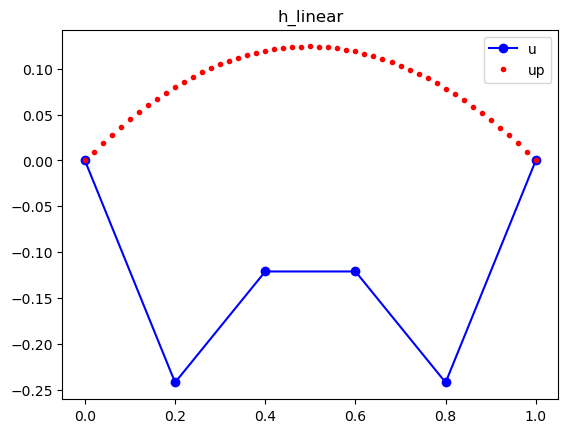

In [82]:
def G_integrate(u, x, N=3, scale=(0, 1)):
    N = N  # 取3个样本点
    a = scale[0]  # 积分上下限
    b = scale[1]
    x, w = roots_legendre(N)
    # print(x)

    xp = x*(b-a)/2+(b+a)/2
    wp = w*(b-a)/2

    s = 0
    for i in range(N):
        s += wp[i]*u(xp[i])
    return s


def fem1d_linear(f, d2f, s=5, p=5):
    #
    #  Define the mesh, N+1 points between A and B.
    #  These will be X[0] through X[N].
    #
    n = s
    a = 0.0
    b = 1.0
    x = np.linspace(a, b, n + 1)
#
#  Set a 3 point quadrature rule on the reference interval [-1,1].
#
    q_num = 3

    xg = np.array((
        -0.774596669241483377035853079956,
        0.0,
        0.774596669241483377035853079956))

    wg = np.array((
        5.0 / 9.0,
        8.0 / 9.0,
        5.0 / 9.0))

#
#  Compute the system matrix A and right hand side RHS.
#
    A = np.zeros((n + 1, n + 1))
    rhs = np.zeros(n + 1)
#
#  Look at element E: (0, 1, 2, ..., N-1).
#
    for p_ in range(2, p+1):
        # if p_==0:
        #     phi.append((1-x)/2)
        #     phi.append((1+x)/2)
        #     dphi.append(np.array([-1/2, -1/2, -1/2]))
        #     dphi.append(np.array([1/2, 1/2, 1/2]))
        for e in range(0, n):

            xl = x[0]
            xr = x[-1]
    #
    #  Consider quadrature point Q: (0, 1, 2 ) in element E.
    #
            for q in range(0, q_num):
                #
                #  Map XG and WG from [-1,1] to
                #      XQ and QQ in [XL,XR].
                #
                # xq = xl + xg[q] * (xr - xl)
                # wq = wg[q] * (xr - xl)
                # xq = xl + (xg[q] + 1.0) * (xr - xl) / 2.0
                # wq = wg[q] * (xr - xl) / 2.0
                xq = ((1.0 - xg[q]) * xl + (1.0 + xg[q]) * xr) / 2.0
                wq = wg[q] * (xr - xl) / 2.0
    #
    #  Consider the I-th test function PHI(I,X) and its derivative PHI'(I,X).
    #
                for i_local in range(0, 2):
                    i = i_local + e
                    if p == 0:
                        phii = (1-xq)/2
                        phiip = -0.5
                    elif p == 1:
                        phii = (1+xq)/2
                        phiip = 0.5
                    else:
                        phii = 1/np.sqrt(4*p_-2) * \
                            (Legendre(xq, p_)-Legendre(xq, p_-2))
                        phiip = np.sqrt(p_-1/2)*(Legendre(xq, p_-1))

                        # if (i_local == 0):
                        #     phii = (xq - xr) / (xl - xr)
                        #     phiip = 1 / (xl - xr)
                        # else:
                        #     phii = (xq - xl) / (xr - xl)
                        #     phiip = 1 / (xr - xl)

                    rhs[i] = rhs[i] + wq * phii * d2f(xq)
    #
    #  Consider the J-th basis function PHI(J,X) and its derivative PHI'(J,X).
    #  (It turns out we don't need PHI for this particular problem, only PHI')
    #
                    for j_local in range(0, 2):
                        j = j_local + e

                        # if (j_local == 0):
                        #     phijp = 1 / (xl - xr)
                        #     #print(phiip)
                        # else:
                        #     phijp = 1 / (xr - xl)
                        if p == 0:
                            phijp = -0.5
                        elif p == 1:
                            phijp = 0.5
                        else:
                            phijp = np.sqrt(p_-1/2)*(Legendre(xq, p_-1))

                        A[i][j] = A[i][j] + wq * phiip * phijp

#
#  Modify the linear system to enforce the left boundary condition.
#
    A[0, 0] = 1.0
    A[0, 1:n+1] = 0.0
    rhs[0] = f(x[0])
#
#  Modify the linear system to enforce the right boundary condition.
#
    A[n, n] = 1.0
    A[n, 0:n] = 0.0
    rhs[n] = f(x[n])

    # print(A)
    # print('_-----------------------\n', rhs)
#  Solve the linear system.
#
    u = la.solve(A, -rhs)
#
#  Evaluate the exact solution at the nodes.
#
    uex = np.zeros(n + 1)
    for i in range(0, n + 1):
        uex[i] = f(x[i])
    err = []
    for i in range(0, n + 1):
        err.append(abs(uex[i] - u[i]))
        # print('  %4d  %14.6g  %14.6g  %14.6g' % (i, u[i], uex[i], err))
#
#  Plot the computed solution and the exact solution.
#  Evaluate the exact solution at enough points that the curve will look smooth.
#
    npp = 51
    xp = np.linspace(a, b, npp)
    up = np.zeros(npp)
    for i in range(0, npp):
        up[i] = f(xp[i])

    # plt.plot(x, u, 'bo-', xp, up, 'r.')
    filename = 'fem1d.png'
    plt.savefig(filename)
    # plt.show()

    # plt.figure()
    plt.plot(x, u, 'bo-', label='u')
    plt.plot(xp, up, 'r.', label='up')
    plt.title('h_linear')
    plt.legend()
    plt.show()
    # print(xp)

    return err, u, up


def exact_fn(x, a=0.5, xb=0.2):

    value = (1 - x) * (np.arctan(a * (x - xb)) + np.arctan(a*xb))
    # value = x * ( 1 - x ) * np.exp ( x )
    return value


def rhs_fn(x, a=0.5, xb=0.2):  # PDE

    B = x-xb
    value = -2*(a+a**3*B*(B-x+1))/(a**2*B**2+1)**2
    # value = -x * ( x + 3 ) * np.exp ( x )
    return value


a = 0.5
xb = 0.2
# err, u, up = fem1d_linear(exact_fn, rhs_fn, 6)
err, u, up = fem1d_linear(exact_fn, rhs_fn, p=5)
# print(err)


In [67]:
x = np.array([1, 2, 3, 4])

print(np.multiply (x, x))

[ 1  4  9 16]


In [85]:
print(52/1.68**2)

18.42403628117914
